In [22]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Select, SelectMultiple
import seaborn as sns
from windrose import WindroseAxes
import numpy as np
import matplotlib.cm as cm

In [23]:
# open files
files = []
for file in os.listdir("."):
    if file.endswith('test.csv'):
        files.append(file) 
        
if len(files) != 0:

    fileselect = Select(
        options=files,
        value=files[0],
        description='Select file:',
        disabled=False
    )
fileselect

Select(description='Select file:', options=('test.csv',), value='test.csv')

* Median – средний заработок работающих полный день круглый год.
* P25th – 25-й процентиль дохода.
* P75th – 75-й процентиль дохода.
* Rank – ранг по среднему заработку.

In [24]:
df = pd.read_csv(fileselect.value, delimiter=",")
df.columns = df.columns.str.strip()
df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


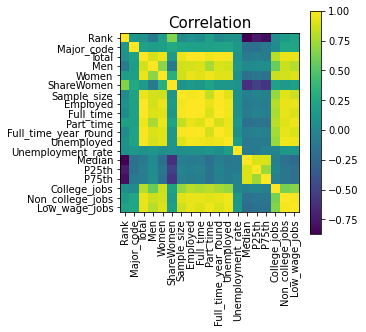

In [25]:
corr = df.corr()
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title("Correlation", fontsize=15)
plt.show()

<AxesSubplot:xlabel='Rank'>

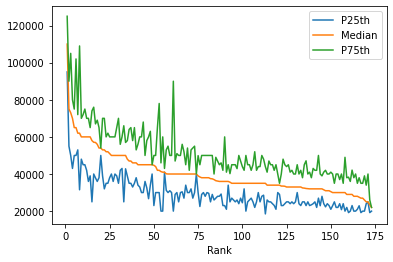

In [26]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

##### Определяется медианным доходом.

In [27]:
ddf = df.select_dtypes(include=['number'])
select = SelectMultiple(
    options=list(ddf.columns),
    value=[list(ddf.columns)[0]],
    description='Поля розы: ',
    disabled=False
)
## major_code & Unemploed
select

SelectMultiple(description='Поля розы: ', index=(0,), options=('Rank', 'Major_code', 'Total', 'Men', 'Women', …

In [28]:
ws = df[select.value[1]]
wd = df[select.value[0]]*360

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(ws.min(), ws.max(), (ws.max()-ws.min())/8), cmap=cm.hot)

ax.set_legend()

IndexError: tuple index out of range

In [ ]:
select 

In [ ]:
#Виолин

ax = sns.violinplot(x=select.value[0],
                    data=df)

In [ ]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])
select2 = SelectMultiple(
    options=list(ddf.columns),
    value=[list(ddf.columns)[0]],
    description='Поля парного сочетания: ',
    disabled=False
)
select2

In [ ]:
#все возможные пары (тут хорошо видно кластеры)
ddf = df[list(select2.value)]
sns.pairplot(ddf)